In [37]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch

In [26]:
# load trained gan
# Hyperparamter for training
LATENT_DIM = 3
NOISE_DIM = 10

#checkpoint_bgan = torch.load("./trained_gan/3_10/checkpoints/model_epoch_2000.pth")
checkpoint_bhgan = torch.load("./trained_gan/3_10/checkpoints/model_epoch_10000.pth")

In [27]:
# load teh model 
from hydFoilGAN.gan import *

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generator model to load from checkpoints
gen_bhgan = Generator(latent_dim=LATENT_DIM,
                     noise_dim=NOISE_DIM).to(device)

In [29]:
# load state_dict from checkpoint
gen_bhgan.load_state_dict(checkpoint_bhgan['model_G_state_dict'])

<All keys matched successfully>

In [30]:
# sample 1 noise and latent vector.
c = torch.FloatTensor(32, LATENT_DIM).uniform_(0.0, 1.0).to(device)
z = torch.FloatTensor(32, NOISE_DIM).normal_(0, 0.5).to(device)

In [31]:
with torch.inference_mode():

    dp, cp, w, _, _ = gen_bhgan(c,z)
    dp = dp.squeeze(1).cpu().numpy()  # (ctrl_pts, 2)
    cp = cp.squeeze(1).cpu().numpy()  # (ctrl_pts, 2)
    w  = w.squeeze(1).cpu().numpy()   # (ctrl_pts, 2)

In [32]:
type(cp)

numpy.ndarray

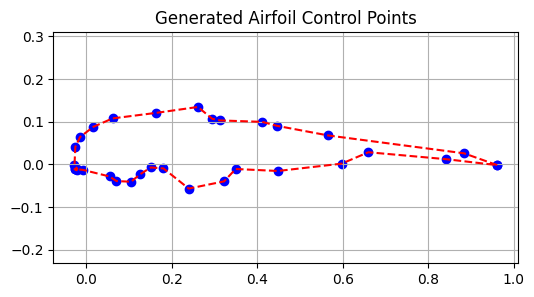

In [39]:
plt.figure(figsize=(6, 3))
plt.scatter(cp[0, :, 0], cp[0, :, 1], c='blue')
plt.plot(cp[0, :, 0], cp[0, :, 1], 'r--')  # optionally connect points
plt.title("Generated Airfoil Control Points")
plt.axis('equal')
plt.grid(True)
plt.show()

In [35]:
cp.shape

(32, 33, 2)

In [40]:
cp[0]

array([[ 0.96138585, -0.00158338],
       [ 0.88384   ,  0.02612429],
       [ 0.56649077,  0.06780314],
       [ 0.44614002,  0.09038079],
       [ 0.4115341 ,  0.09970152],
       [ 0.31299725,  0.10303935],
       [ 0.29459992,  0.10689399],
       [ 0.26096144,  0.13453081],
       [ 0.16354877,  0.12075137],
       [ 0.06136283,  0.1078193 ],
       [ 0.01607985,  0.08796653],
       [-0.01463858,  0.06432499],
       [-0.02585825,  0.04114148],
       [-0.02780778, -0.00208855],
       [-0.02126434, -0.01009716],
       [-0.02274561, -0.01350914],
       [-0.02770844, -0.0110163 ],
       [-0.0262782 , -0.0107668 ],
       [-0.00775763, -0.01269741],
       [ 0.05417646, -0.02806944],
       [ 0.07040136, -0.03881707],
       [ 0.10465924, -0.04036817],
       [ 0.12551303, -0.02305319],
       [ 0.15077348, -0.00696766],
       [ 0.18042012, -0.00926246],
       [ 0.23959693, -0.05641636],
       [ 0.32226762, -0.03957215],
       [ 0.34929478, -0.01059828],
       [ 0.4482055 ,

In [47]:
w[6]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [48]:
np.savetxt('cp_33_2.txt', cp[0], fmt="%.6f")
np.savetxt('w_33_1.txt', w[0], fmt="%.6f")